In [21]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
(x_train,_),(x_test,_)=mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [23]:
x_train_scaled=x_train.astype('float32')/255
x_test_scaled=x_test.astype('float32')/255
x_train_scaled=np.reshape(x_train_scaled,(len(x_train_scaled),28,28,1))
x_test_scaled=np.reshape(x_test_scaled,(len(x_test_scaled),28,28,1))

In [24]:
noise_factor = 0.5
x_train_noisy = x_train_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train_scaled.shape)
x_test_noisy = x_test_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test_scaled.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

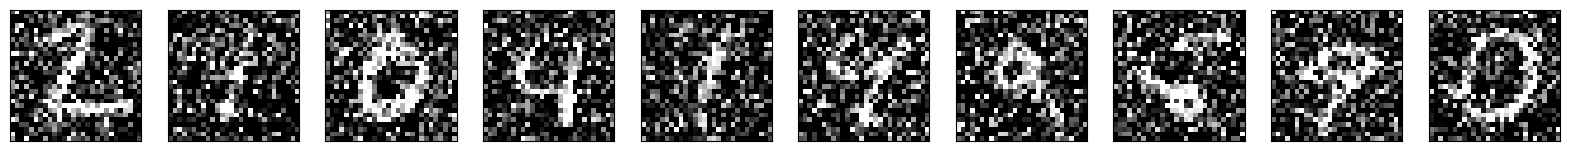

In [25]:
n=10
plt.figure(figsize=(20,2))
for i in range(1,n+1):
  ax=plt.subplot(1,n,i)
  plt.imshow(x_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

In [42]:
input_img = keras.Input(shape=(28, 28, 1))

x=layers.Conv2D(16,(5,5),activation='relu',padding='same')(input_img)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.MaxPooling2D((2,2),padding='same')(x)
x=layers.Conv2D(8,(7,7),activation='relu',padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(encoded)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(4,(3,3),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(8,(5,5),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(5,5),activation='relu',padding='same')(x)
x=layers.UpSampling2D((2,2))(x)
x=layers.Conv2D(16,(5,5),activation='relu')(x)
x=layers.UpSampling2D((1,1))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)


In [43]:
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 14, 14, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 4)         580       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 7, 7, 4)           0         
 ng2D)                                                           
                                                                 
 conv2d_48 (Conv2D)          (None, 7, 7, 4)           148 

In [44]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [45]:
autoencoder.fit(x_train_noisy, x_train_scaled,
                epochs=3,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_scaled))

Epoch 1/3
469/469 [==============================] - 185s 389ms/step - loss: 0.2527 - val_loss: 0.1987
Epoch 2/3
469/469 [==============================] - 180s 383ms/step - loss: 0.1869 - val_loss: 0.1793
Epoch 3/3
469/469 [==============================] - 180s 384ms/step - loss: 0.1740 - val_loss: 0.1723


<Axes: >

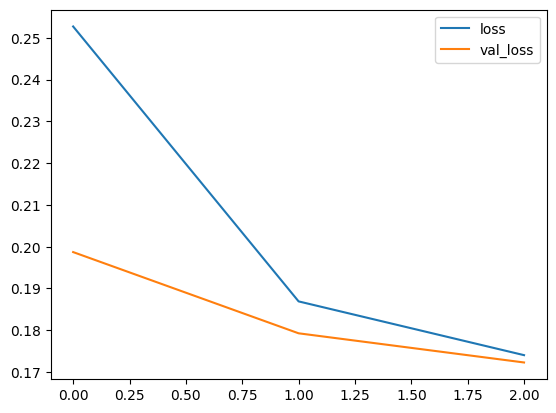

In [46]:
metrics = pd.DataFrame(autoencoder.history.history)
metrics[['loss','val_loss']].plot()

In [47]:
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 7s 22ms/step


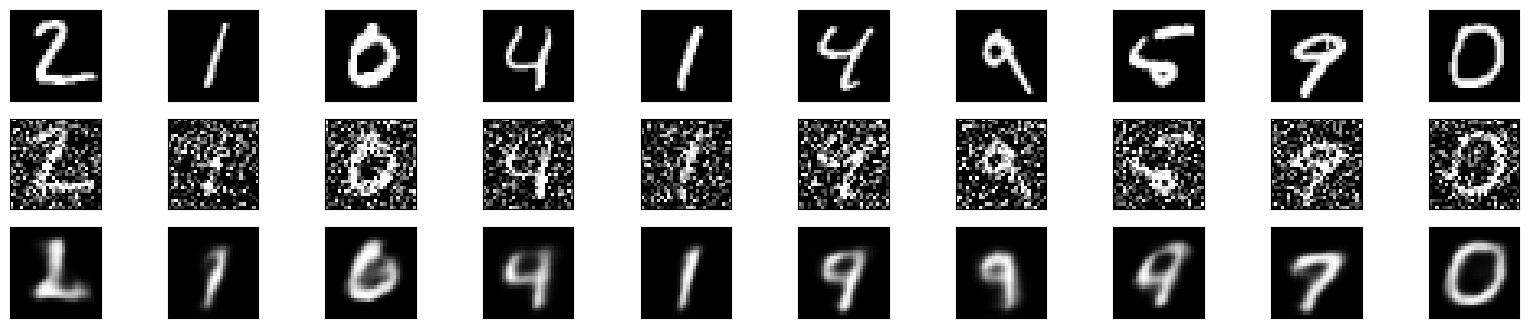

In [48]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test_scaled[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy
    ax = plt.subplot(3, n, i+n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()